In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 6.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec
import seaborn as sns
from sklearn.utils import shuffle


In [ ]:
df = pd.read_excel('/content/T-HSAB.xlsx')
df.head()


,Text,Nature
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,hate
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal
2,تلوموش لطفي لعبدلي شرف,normal
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal


In [ ]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

# Create the dictionary
event_dictionary ={'normal' : 1, 'hate' : 0, 'abusive' : 0}

# Add a new column named 'Price'
df['Label'] = df['Nature'].apply(set_value, args =(event_dictionary, ))

# Print the DataFrame
df.head()

,Text,Nature,Label
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,hate,0
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,normal,1
2,تلوموش لطفي لعبدلي شرف,normal,1
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,normal,1
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,normal,1


In [ ]:
print(len(df))

6024


In [ ]:
pip install arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.io import excel
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display



ModuleNotFoundError: ignored

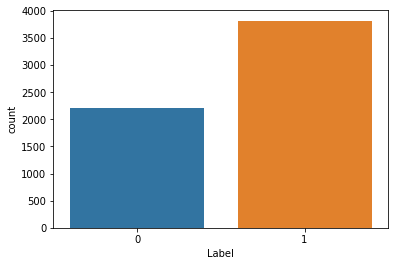

In [ ]:
sns.countplot(x='Label', data=df)

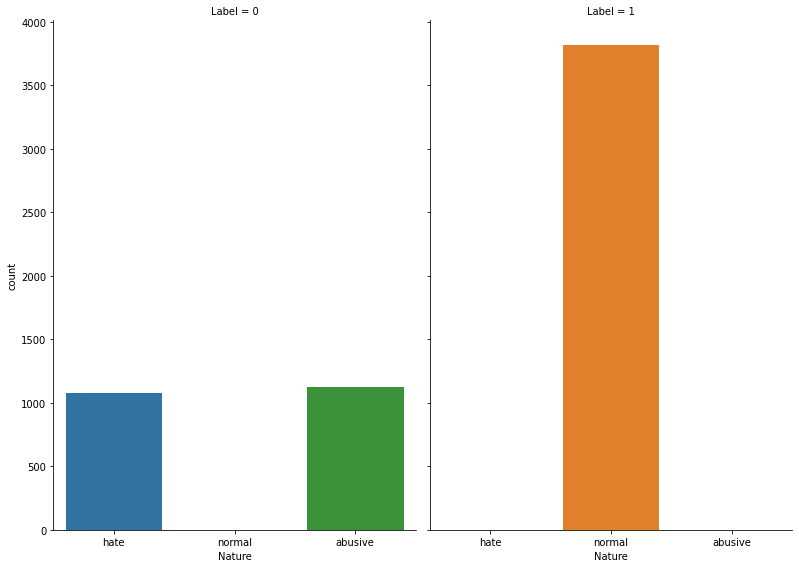

In [ ]:
g = sns.catplot(x="Nature", col="Label",
                data=df, kind="count",
                height=8, aspect=.7);

# Data Preparation

In [ ]:
import string,re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\r', '', text)
    return text

In [ ]:
#nahina arkam ou ponctuation
df['Text'] = df['Text'].apply(lambda x: remove_punct(x))

In [ ]:
!pip install pyarabic
!pip install farasapy
!pip install tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 251 kB 4.6 MB/s 


# Normalized the words


In [ ]:
import pyarabic.araby as araby
def normalization(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)



In [ ]:
text="قالوا الموفقُ شِيعِيٌّ فقلتُ لهم"
normalization(text)

'قالوا الموفق شيعي فقلت لهم'

In [ ]:
test=df['Text'][5]
print(test)

ترضى اليهود والنصارى تتبع ملتهم الحمد لله يوجد يهود الجزائر وتربينا كرههم


In [ ]:
normalization(test)

'ترضي اليهود والنصاري تتبع ملتهم الحمد لله يوجد يهود الجزاءر وتربينا كرههم'

# Machine Learning Part

We will try a machine learning approach that will learn how to separate our dataset in three classes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = df.Text.values
y = df.Label.values
y.shape


(6024,)

Split text and label into two groups training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True, random_state=42)
# Our vectorized labels
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

Import the needed libraries

In [ ]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

Creating pipeline to treat data

In [ ]:
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf

Implement accuracy method


We use accuracy to measure the ability of the model to detect pattterns between data based on input and training set. It is a very important metrics used to know which model fits best our cases

In [ ]:
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy

Implement F1 score method


F1 score is metrics to measure accuracy of the predictions.
it combines between Prediction and recall.
Prediction: measure how many postive prediction where actually positive
Recall: measure how many real positive where actually predicted positive

In [ ]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

# F1 VS Accuracy

Accuracy measures the performance of the model. F1-score gives better measurement to incorrect classification

# Classification Logistic Regression

Since we are Detecting and classifying hate speeches through social medias. We will use a model widely used in classification as logistic regression.It will measure the correaltion between the text retrieved from internet and ou labels. Which is a predictive analysis algorithm based on probablity. Since we have three classification types as text are labelled as "Hate","Normal","Abusive". We will use a multi-linear logistic function.

In [ ]:
from sklearn.linear_model import LogisticRegression
trained_clf_logistic_regressing = train_model(LogisticRegression(),X_train, y_train)
y_pred=trained_clf_logistic_regressing.predict(X_test)
accuracy_LR = get_accuracy(trained_clf_logistic_regressing,X_test, y_test)
f1_Score_LR=get_F1(trained_clf_logistic_regressing,X_test,y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy_LR:.5f}")
print("Test dataset f1-score with LogisticRegression:",f1_Score_LR)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test dataset accuracy with LogisticRegression: 0.59134
Test dataset f1-score with LogisticRegression: [0.56784969 0.84424379]
              precision    recall  f1-score   support

         0.0       0.90      0.41      0.57       656
         1.0       0.75      0.97      0.84      1152

    accuracy                           0.77      1808
   macro avg       0.82      0.69      0.71      1808
weighted avg       0.80      0.77      0.74      1808



Support is the number of class occurence in the dataset

# Classification using K-nearest neighbor


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
trained_clf_kNeighbor = train_model(KNeighborsClassifier(),X_train, y_train)
y_pred=trained_clf_kNeighbor.predict(X_test)
accuracy_KN = get_accuracy(trained_clf_kNeighbor,X_test, y_test)
f1_Score_KN=get_F1(trained_clf_kNeighbor,X_test,y_test)
print(f"Test dataset accuracy with kNeighbor: {accuracy_KN:.5f}")
print("Test dataset f1-score with kNeighbor:",f1_Score_KN)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test dataset accuracy with kNeighbor: 0.56343
Test dataset f1-score with kNeighbor: [0.61120841 0.82053355]
              precision    recall  f1-score   support

         0.0       0.72      0.53      0.61       656
         1.0       0.77      0.88      0.82      1152

    accuracy                           0.75      1808
   macro avg       0.74      0.71      0.72      1808
weighted avg       0.75      0.75      0.74      1808



# Classification Using Decision Tree

The most powerful and widely used tool for classification and prediction is the Decision Tree. A Decision tree is a tree structure that appears like a flowchart, with each internal node representing a test on an attribute, each branch representing a test outcome, and each leaf node (terminal node) carrying a class label.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_decision_tree = train_model(DecisionTreeClassifier(),X_train, y_train)
y_pred=trained_clf_decision_tree.predict(X_test)
accuracy_DT = get_accuracy(trained_clf_decision_tree,X_test, y_test)
f1_Score_DT=get_F1(trained_clf_decision_tree,X_test,y_test)
print(f"Test dataset accuracy with DecisionTreeClassifier: {accuracy_DT:.5f}")
print("Test dataset f1-score with DecisionTreeClassifier:",f1_Score_DT)
print(classification_report(y_test, y_pred))

Test dataset accuracy with DecisionTreeClassifier: 0.55356
Test dataset f1-score with DecisionTreeClassifier: [0.62966031 0.81444583]
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       656
         1.0       0.78      0.85      0.81      1152

    accuracy                           0.75      1808
   macro avg       0.74      0.72      0.72      1808
weighted avg       0.75      0.75      0.75      1808



# Classification Using Random Forest

Random Forest is an ensemble technique that can handle both regression and classification tasks by combining many decision trees and a technique known as Bootstrap and Aggregation, or bagging. The core idea is to use numerous decision trees to determine the final output rather than depending on individual decision trees.
Random Forest's foundation learning models are numerous decision trees. We randomly select rows and features from the dataset to create sample datasets for each model. This section is known as Bootstrap.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = train_model(RandomForestClassifier(), X_train, y_train)
y_pred=trained_clf_random_forest.predict(X_test)
accuracy_RF = get_accuracy(trained_clf_random_forest,X_test, y_test)
f1_Score_RF=get_F1(trained_clf_random_forest,X_test,y_test)
print(f"Test dataset accuracy with RandomForestClassifier: {accuracy_RF:.5f}")
print("Test dataset f1-score with RandomForestClassifier:",f1_Score_RF)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Test dataset accuracy with RandomForestClassifier: 0.57936
Test dataset f1-score with RandomForestClassifier: [0.6268081  0.84994184]
              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63       656
         1.0       0.77      0.95      0.85      1152

    accuracy                           0.79      1808
   macro avg       0.81      0.72      0.74      1808
weighted avg       0.80      0.79      0.77      1808



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','kNeighbours','Decision Tree','Random Forest'],
    'Accuracy': [accuracy_LR,accuracy_KN,accuracy_DT,accuracy_RF],
     'F1 Score':[f1_Score_LR, f1_Score_RF,f1_Score_KN,f1_Score_DT]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy,F1 Score
0,Logistic Regression,0.591344,"[0.5678496868475991, 0.8442437923250565]"
1,Random Forest,0.579357,"[0.6296603148301575, 0.8144458281444583]"
2,kNeighbours,0.563425,"[0.626808100289296, 0.849941837921675]"
3,Decision Tree,0.553562,"[0.6112084063047285, 0.8205335489086499]"


# Deep Learning Part


Import the needed libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
#from keras.utils import pad_sequences
%matplotlib inline


# Tokenize
We tokenize the data by splitting test into words

In [ ]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(df["Text"])
vocab_size = len(t.word_index) + 1

Tranform text into sequence. which mean convert words into integers

In [ ]:
list_tokenized_train=t.texts_to_sequences(X_train)
list_tokenized_test=t.texts_to_sequences(X_test)

We pad the tokenized sequence

In [ ]:
maxlen = 580
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

# Simple RNN Model
# We design an RNN model wih 3 layers

In [ ]:
from keras.layers import Bidirectional, GlobalMaxPool1D
inp = Input(shape=(maxlen, ))
embed_size = 100
x = Embedding(vocab_size, embed_size)(inp)
x = LSTM(100, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dense(1, activation="sigmoid")(x)

Compile the Model

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 580)]             0         
                                                                 
 embedding (Embedding)       (None, 580, 100)          2717200   
                                                                 
 lstm_layer (LSTM)           (None, 580, 100)          80400     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                             

Train the model

In [ ]:
model.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.1)

119/119 [==============================] - 69s 560ms/step - loss: 0.6611 - accuracy: 0.6265 - val_loss: 0.6075 - val_accuracy: 0.6967


Model Evalutation

In [ ]:
loss,acc = model.evaluate(X_te,y_test, verbose = 0, batch_size = 32)
print("acc: %.5f" % (acc))

acc: 0.65763
Loss: 0.622781


# RNN Model Using ARAVEC word embedding model

Install gensim which is one of the fastest libraries to train word embedding

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download the embedded file full ini twitter of dimension 300

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip" -O full_uni_cbow_300_twitter.zip && rm -rf /tmp/cookies.txt
!unzip full_uni_cbow_300_twitter.zip

Cannot open cookies file ‘/tmp/cookies.txt’: No such file or directory
--2022-12-08 21:53:44--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2833686412 (2.6G) [application/zip]
Saving to: ‘full_uni_cbow_300_twitter.zip’

full_uni_cbow_300_t 100%[===================>]   2.64G  34.5MB/s    in 85s     

2022-12-08 21:55:09 (31.9 MB/s) - ‘full_uni_cbow_300_twitter.zip’ saved [2833686412/2833686412]

Archive:  full_uni_cbow_300_twitter.zip
replace full_uni_cbow_300_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Load the Embedding file

In [ ]:
w2v_embeddings_index={}
TOTAL_EMBEDDING_DIM=300
embeddings_file='/content/full_uni_cbow_300_twitter.mdl'
w2v_model =KeyedVectors.load(embeddings_file)

Load the model

In [ ]:
words = list(w2v_model.wv.index_to_key)

Load embedded vector

In [ ]:
w2v_embeddings_index={}
for key in words:
    w2v_embeddings_index[key] =w2v_model.wv.get_vector(key)

Display vector length

In [ ]:
print("Loaded %s word vectors."% len(w2v_embeddings_index))

Create Embedding Matric

In [ ]:
embedding_matrix = np.zeros((vocab_size, TOTAL_EMBEDDING_DIM))
for word, i in t.word_index.items():
    embedding_vector = w2v_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Display Embedded Matrix Shape

In [ ]:
print("Embedding Matrix shape:", embedding_matrix.shape)

Load embedding layer using keras library

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, TOTAL_EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False)

Design RNN aravec model

In [ ]:
input_placeholder= Input(shape=(maxlen,))
input_embedding = embedding_layer(input_placeholder)
lstm= LSTM(100, return_sequences=True,name='lstm_layer_2')(input_embedding)
y = GlobalMaxPool1D()(lstm)
y = Dense(50, activation="relu")(lstm)
y = Dropout(0.1)(y)
preds = Dense(1, activation='sigmoid', name = 'activation')(y)
modelaravec = Model(inputs=input_placeholder, outputs=preds)

LOad the Model

In [ ]:
modelaravec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Summarize the model

In [ ]:
print(modelaravec.summary())

Train the RNN and aravec model

In [ ]:
modelaravec.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
loss,accuracy = modelaravec.evaluate(X_te,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))
print("Loss: %5f"% (loss))


# Transformers Part

Load transformer

In [ ]:
!pip install transformers

Load the pretrained arabert transformer

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
arabic_bert = TFAutoModelForSequenceClassification.from_pretrained("asafaya/bert-base-arabic")


We convert our data to format accepted by transformer. We tokenize the data and pad them

In [ ]:
def convert_text_to_feature(text):
  return tokenizer.encode_plus(text,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )
max_length = 150
batch_size = 32

We continue transforming raw data to format acceptable by arabert


In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label
def encode_examples(data,label,limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for i in range(len(data)):
    bert_input = convert_text_to_feature(data[i])
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label[i]])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Tip
Since we are working with tranfromers we will encode the data then decode them 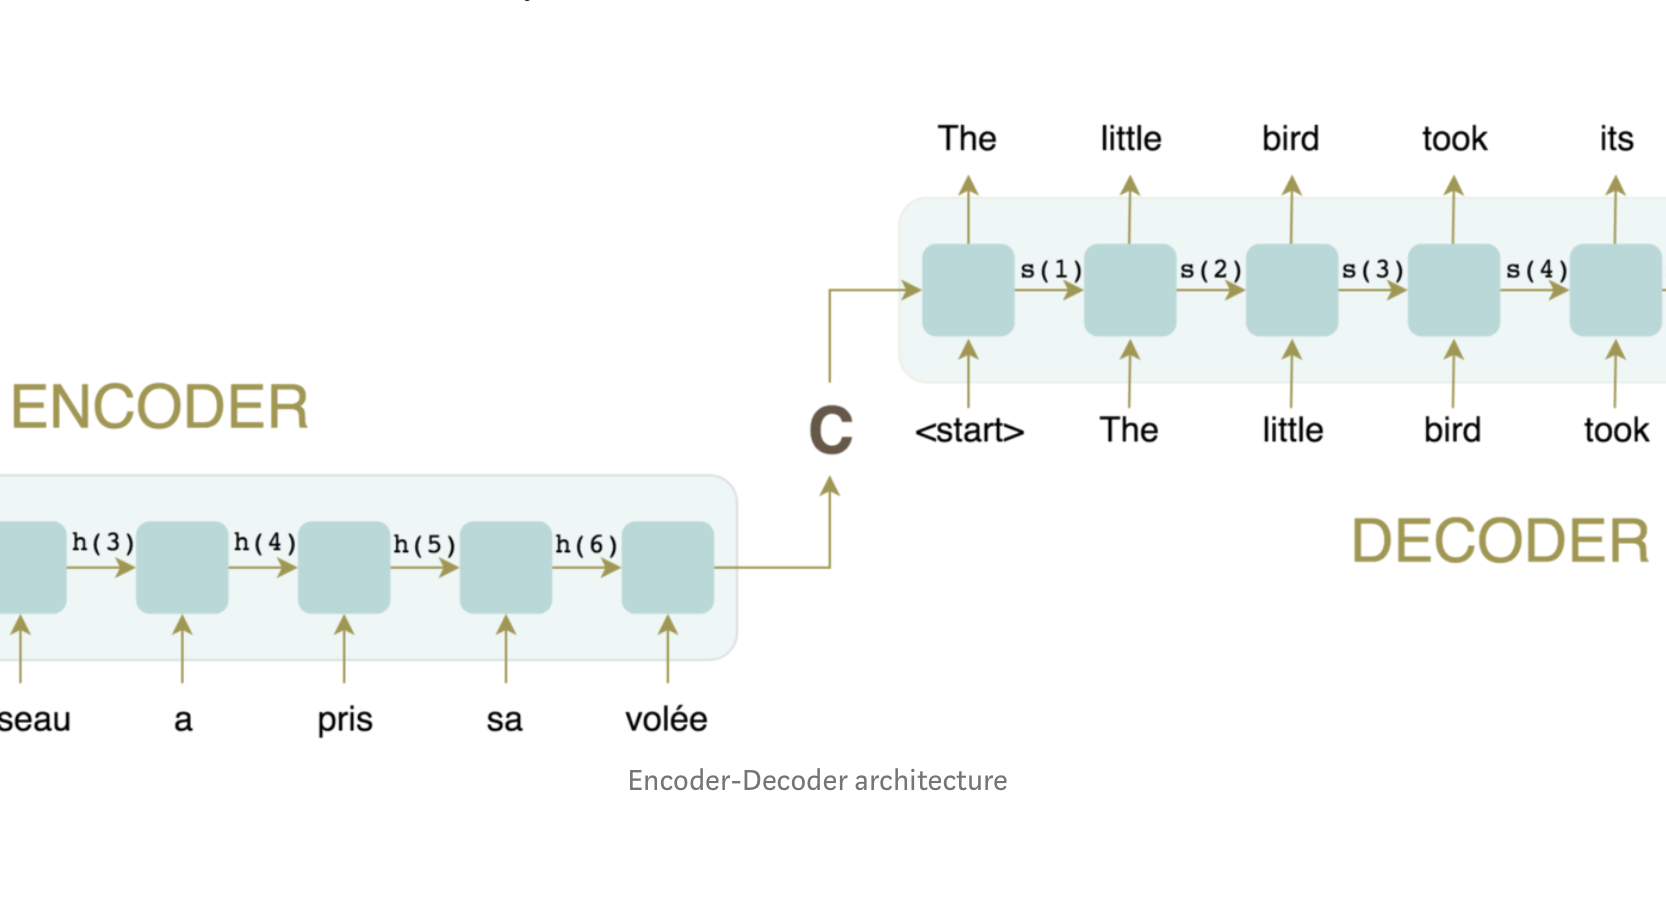

# Encode the dataset

In [ ]:

ds_train_encoded = encode_examples(X_train,y_train).shuffle(1000).batch(batch_size)

ds_test_encoded = encode_examples(X_test,y_test).batch(batch_size)

We choose the hyperparameters of our transformer model

In [ ]:

learning_rate = 2e-5

number_of_epochs = 1

model=arabic_bert
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

Train and Evaluate the model

In [ ]:
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_test_encoded)
loss,accuracy = bert_history.evaluate(ds_train_encoded,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))